# **Titanic Survival Prediction**

Step1: Import necessary libraries

In [41]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For better visualization
from sklearn.model_selection import train_test_split  # To split the dataset
from sklearn.preprocessing import LabelEncoder  # To convert categorical to numeric
from sklearn.ensemble import RandomForestClassifier  # Our prediction model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluation
import joblib


Step 2: Load the Titanic dataset

In [42]:
data = pd.read_csv("D:\DATASETS\Titanic-Dataset.csv")
data.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\comp\AppData\Local\Temp\ipykernel_13860\2311566441.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\DATASETS\Titanic-Dataset.csv")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Step 3: Understand the data

In [43]:
print("\nInformation about dataset columns:\n")
print(data.info())


Information about dataset columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [44]:
print("\nStatistical summary of numerical features:\n")
print(data.describe())


Statistical summary of numerical features:

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Step 4: Checking for missing values

In [45]:
print("\nMissing values in each column:\n")
print(data.isnull().sum())


Missing values in each column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Step 5: Exploratory Data Analysis(EDA)

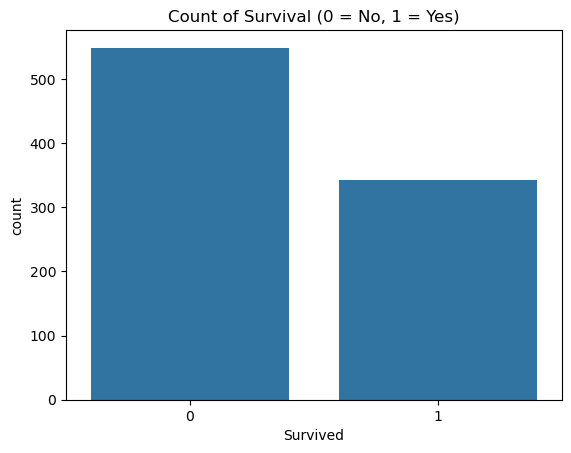

In [46]:
# Survival counts
sns.countplot(x='Survived', data=data)
plt.title('Count of Survival (0 = No, 1 = Yes)')
plt.show()

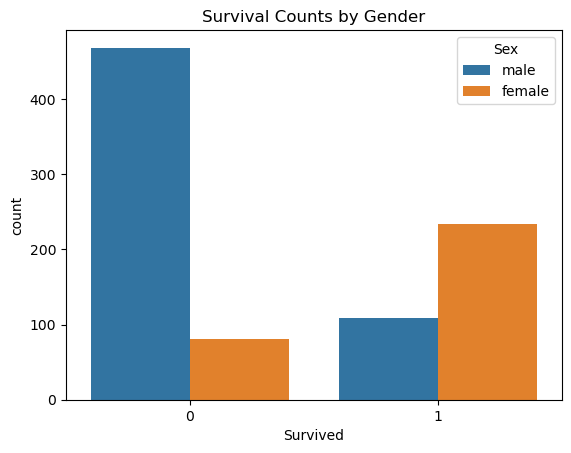

In [47]:
# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Counts by Gender')
plt.show()


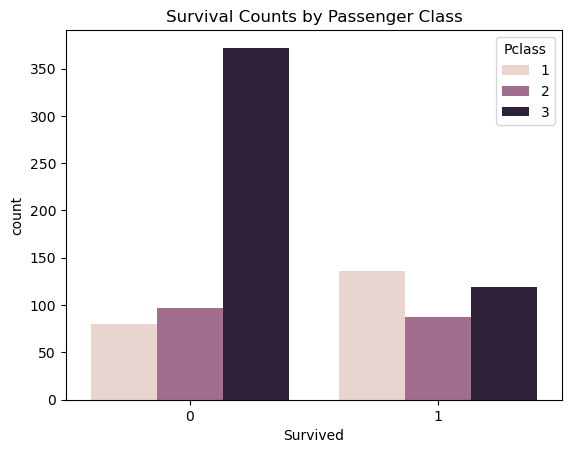

In [48]:
# Survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival Counts by Passenger Class')
plt.show()

Step 6: Data Preprocessing 

In [49]:
# Handling missing 'Age' values

data['Age'].fillna(data['Age'].median(), inplace=True)

# Handling missing 'Embarked' values

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Dropping the 'Cabin' column

data.drop('Cabin', axis=1, inplace=True)

# Dropping 'Ticket' column (optional)

data.drop('Ticket', axis=1, inplace=True)


C:\Users\comp\AppData\Local\Temp\ipykernel_13860\2640396217.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\comp\AppData\Local\Temp\ipykernel_13860\2640396217.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [50]:
# Encoding categorical variables
# Converting 'Sex' and 'Embarked' from text to numeric

le = LabelEncoder()
'''
data['Sex'] = le.fit_transform(data['Sex'])  # male:0, female:1
data['Embarked'] = le.fit_transform(data['Embarked'])  # C=0, Q=1, S=2 (for example)
'''

le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
joblib.dump(le_sex, 'le_sex.pkl')

le_embarked = LabelEncoder()
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])
joblib.dump(le_embarked, 'le_embarked.pkl')


# Double-check data after preprocessing
print("\nData after preprocessing:\n")
print(data.head())


Data after preprocessing:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

      Fare  Embarked  
0   7.2500         2  
1  71.2833         0  
2   7.9250         2  
3  53.1000         2  
4   8.0500         2  


Step 7: Feature Selection

In [51]:
# Selecting features (inputs) and target (output)
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y = data['Survived']  # Target variable


Step 8: Splitting the dataset

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 9: Model Building

In [53]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Step 10: Model Prediction
# Predicting survival on test data
y_pred = model.predict(X_test)


Step 11: Model Evaluation


Model Accuracy: 0.82

Confusion Matrix:
 [[92 13]
 [19 55]]


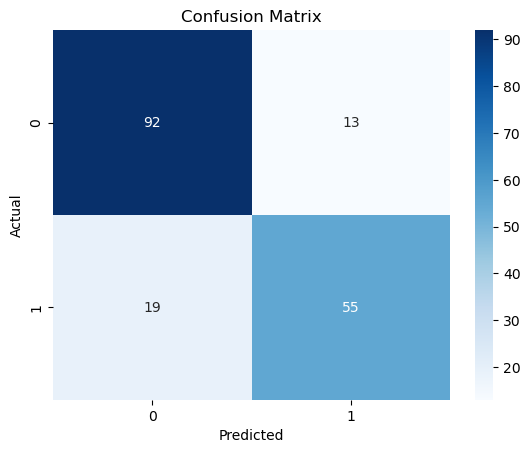


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [55]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plotting Heatmap for observing the correlations
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
# It gives precision, recall, f1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Step 12: Feature Importance

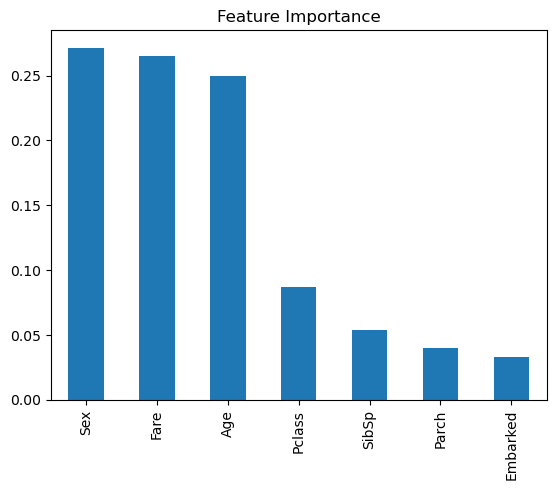

In [56]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()


# **Interpretations**

- Higher bars mean the feature contributed more to the model's decisions.
- Commonly, 'Sex' (gender) and 'Fare' (ticket price) turn out to be important.

# **Summary**

- The Random Forest model achieved a reasonable accuracy on the Titanic dataset.
- Gender and ticket class played important roles in survival.
- Females and first-class passengers had a higher chance of survival.
- We handled missing data and encoded categorical features properly.
- We explored the data visually and numerically before modeling.


# Creating a .pkl file for Streamlit Web app

In [57]:
import joblib

# Save your model
joblib.dump(model, 'titanic_model.pkl')
joblib.dump(le_sex, 'le_sex.pkl')  # If you used a LabelEncoder
joblib.dump(le_embarked, 'le_embarked.pkl')


['le_embarked.pkl']